<h1><center>Laboratorio 6: El Pandas no Muerde (act IV) 🐼</center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos</strong></center>

### Cuerpo Docente:

- Profesores: Pablo Badilla, Ignacio Meza
- Auxiliar: Sebastián Tinoco
- Ayudante: Felipe Arias, Diego Cortez

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: Luis Gutiérrez 
- Nombre de alumno 2: Juan Carlos Cuevas

### **Link de repositorio de GitHub:** `https://github.com/LuisGutierrezG/LuisGutierrezG-LABS`


## Reglas:

- **Grupos de 2 personas**
- Asistencia **obligatoria** a instrucciones del lab (viernes 16.15). Luego, pueden quedarse trabajando en las salas o irse.
- **No se revisarán entregas de personas ausentes**. 
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Prohibidas las copias. 
- Pueden usar cualquer matrial del curso que estimen conveniente.

### Objetivos principales del laboratorio

- Aplicar los paradigmas y buenas prácticas de programación vistas hasta este momento.
- Comprender y aprovechar las ventajas que nos ofrece la liberia `numpy` con respecto a trabajar en Python 'puro'.
- Visualizar aplicaciones de filtros de imágenes sin el uso de librerías.
- Verificar que el uso indiscriminado de `for` puede afectar en la eficiencia en al procesar datos masivos.


El laboratorio deberá ser desarrollado sin el uso indiscriminado de iteradores nativos de python (aka "for", "while"). La idea es que aprendan a exprimir al máximo las funciones optimizadas que nos entrega `numpy`, las cuales vale mencionar, son bastante más eficientes que los iteradores nativos sobre arreglos (*o tensores*).

## Descripción del laboratorio.

### Importamos librerias utiles 😸

In [1]:
# Libreria Core del lab.
import numpy as np
# !pip install --upgrade pandas
# !pip install xlrd
# !pip install openpyxl
import pandas as pd
import datetime
from scipy import stats

from IPython.display import display, Markdown, Latex

#Libreria para plotear
# !pip install --upgrade plotly
# !pip install missingno
import matplotlib.pyplot as plt
import missingno as msno
import plotly.express as px

In [2]:
# Si usted está utilizando Colabolatory le puede ser útil este código para cargar los archivos.
try:
    from google.colab import drive
    drive.mount("/content/drive")
    path = 'Dirección donde tiene los archivos en el Drive'
except: 
    print('Ignorando conexión drive-colab')

Ignorando conexión drive-colab


# Segmentación de Clientes en Tienda de Retail 🛍️

<p align="center">
  <img width=300 src="https://s1.eestatic.com/2018/04/14/social/la_jungla_-_social_299733421_73842361_854x640.jpg">
</p>

## 1.1 Cargar Dataset

Mr. Lepin Mora quien es el gerente de una cotizada tienda de retail en Europa, les solicita si pueden analizar los datos de algunas de sus tiendas.

Para esto, el área de ventas les entrega el archivo `online_retail_II.pickle` con el que se les pide que cargue y visualicen algunas de las filas que componen el Dataset.

Realice una primera visualización de los datos y señale los atributos que componen el dataset. Señale las columnas que conforman el dataset, el tipo de variable presente en cada columna y comente que representa cada una de estas.

**Respuesta:**

In [46]:
df_retail = pd.read_pickle("online_retail_II.pickle")
df_retail = df_retail.astype(
    {
        "Invoice": "category",
        "StockCode": "category",
        "Description": str,
        "Customer ID": "category",
    }
)

### Respuesta:
A continuación se pueden ver las columnas que componen el dataset, el tipo de variable presente en cada columna y una breve descripción de lo que representa cada una de estas.

In [47]:
df_retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  category      
 1   StockCode    525461 non-null  category      
 2   Description  525461 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  category      
 7   Country      525461 non-null  object        
dtypes: category(3), datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 24.6+ MB


Descripción de las columnas:
- Invoice: Número de factura. Pareciera ser un número asignado de forma única a cada transacción/boleta. Algunos comienzan con la letra 'c', lo que puede indicar una cancelación.
- StockCode: Código de producto (artículo). Un número que puede terminar en alguna letra asignado de forma única a cada producto distinto.
- Description: Nombre del producto (artículo). String.
- Quantity: Las cantidades de cada producto (artículo) vendido  por transacción. Numérico.
- InvoiceDate: Fecha y hora de la transacción. 
- Price: Precio unitario del producto. Numérico.
- Customer ID: Número único de cliente. Nominal.
- Country: String. El nombre del país donde reside cada cliente.


In [7]:
df_retail.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [17]:
# Revisamos un stockcode en particular para validar si el precio es unitario o no.
df_retail[df_retail['StockCode'] == '85123A']


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
102,489442,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2009-12-01 09:46:00,2.95,13635.0,United Kingdom
147,489446,85123A,WHITE HANGING HEART T-LIGHT HOLDER,32,2009-12-01 10:06:00,2.55,13758.0,United Kingdom
271,489465,85123A,WHITE HANGING HEART T-LIGHT HOLDER,64,2009-12-01 10:52:00,2.55,13767.0,United Kingdom
284,489467,85123A,21733 mixed,-192,2009-12-01 10:53:00,0.00,NaN,United Kingdom
366,489517,85123A,WHITE HANGING HEART T-LIGHT HOLDER,1,2009-12-01 11:34:00,2.95,16329.0,United Kingdom
...,...,...,...,...,...,...,...,...
524412,538086,85123A,WHITE HANGING HEART T-LIGHT HOLDER,14,2010-12-09 14:44:00,2.95,12872.0,United Kingdom
524519,538095,85123A,WHITE HANGING HEART T-LIGHT HOLDER,1,2010-12-09 14:55:00,2.95,17097.0,Spain
524733,538145,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-09 16:08:00,2.95,15211.0,United Kingdom
525223,538157,85123A,WHITE HANGING HEART T-LIGHT HOLDER,4,2010-12-09 16:57:00,2.95,17576.0,United Kingdom


In [15]:
# se muestran los valores de invoice que empiezan con 'c'
df_retail[df_retail["Invoice"].str.contains("C", na=False)].head()

# Tienen valores negativos, pueden ser devoluciones

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia


In [4]:
# se agrupa por stockcode y se suma por la columna quantity para identificar el stockcode con mayor cantidad de ventas
df_retail_stockcode = df_retail.groupby("StockCode").sum()["Quantity"]
df_retail_stockcode = df_retail_stockcode.sort_values(ascending=False)
df_retail_stockcode.head()


/var/folders/9z/f3pd2_993pgfk8l_z9thq4yc0000gn/T/ipykernel_6862/811158550.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_retail_stockcode = df_retail.groupby("StockCode").sum()["Quantity"]


StockCode
21212     59411
85123A    57236
84077     54698
85099B    48376
17003     47647
Name: Quantity, dtype: int64

## 1.2 Analisís Explotatorio de los Datos [0.5 puntos] 

En base a la primera visualización del dataset, *Don Mora* le solicita que realicen un análisis exploratorio de los datos, para esto les deberán realizar un análisis univariado y multivariado. De la revisión, ustedes deben explicar potenciales anomalías visualizadas y señalar si existe la necesidad de realizar una limpieza de datos.

Explique a que nos referimos con análisis univariable, multivariable y de datos faltantes. ¿Qué beneficios nos otorga estudiar estos datos?. Sea conciso con su respuesta y no escriba mas de 5 líneas para su respuesta.

**Respuesta a la Pregunta:**

La diferencia entre análisis univariado y multivariado, es que el primero se enfoca en el estudio de una sola variable, mientras que el segundo se enfoca en la relación entre dos o más variables. El análisis de datos faltantes se refiere a la identificación de los datos que faltan en el dataset, y a la decisión de qué hacer con estos datos, como sacarlos o corregirlos.

Los principales beneficios de estudiar los datos son que nos permite identificar anomalías en los datos, para luego realizar los análisis correctos y no desviados por algún valor en particular para luego sacar conclusiones útiles. 

In [20]:
# se calcula el total de nulls por columna
total_nulls = df_retail.isnull().sum()
# se calcula el porcentaje de nulls por columna
percent_nulls = total_nulls / df_retail.shape[0]
df_nulls = pd.DataFrame(
    {"Total nulls": total_nulls, "Percent nulls": percent_nulls}
).sort_values(by="Percent nulls", ascending=False)
df_nulls



,Total nulls,Percent nulls
Customer ID,107927,0.205395
Invoice,0,0.000000
StockCode,0,0.000000
Description,0,0.000000
Quantity,0,0.000000
InvoiceDate,0,0.000000
Price,0,0.000000
Country,0,0.000000


### 1.2.1 Análisis Univariado [2 Puntos]

A continuación, se le presentan dos funciones para analizar los datos que componen un dataframe. La primera de estas es la función ``profile_serie()`` la cual recibe una serie y le entrega un análisis detallado de los datos que conforman dicha serie. 

Ejecute la funcion ``profile_serie()`` sobre cada serie para realizar un análisis univariado de estas. A continuación, comente acerca de el comportamiento de cada variable según las estadísticas descriptivas y los gráficos generados.

In [21]:
from pandas.api.types import is_numeric_dtype
from pandas.core.dtypes.common import is_datetime_or_timedelta_dtype


def profile_serie(serie_in, n_samples=1000, random_state=42):
    serie = serie_in.copy()

    profile = pd.Series(dtype='object')
    profile["Type"] = serie.dtype
    profile = pd.concat([profile, serie.describe()])

    # profile = pd.Series([])

    if is_numeric_dtype(serie):
        profile["Negative"] = (serie < 0).sum()
        profile["Negative (%)"] = (
            str(round((serie < 0).sum() / len(serie) * 100, 2)) + " %"
        )
        profile["Zeros"] = (serie == 0).sum()
        profile["Zeros (%)"] = (
            str(round((serie == 0).sum() / len(serie) * 100, 2)) + " %"
        )
        profile["Kurt"] = serie.kurt()
        profile["Skew"] = serie.skew()

    profile[" "] = " "  # espacio

    profile["Missing cells"] = serie.isnull().sum()
    profile["Missing cells (%)"] = (
        str(round(serie.isnull().sum() / len(serie) * 100, 2)) + " %"
    )
    profile["Duplicate rows"] = serie.duplicated(False).sum()
    profile["Duplicate rows (%)"] = (
        str(round(serie.duplicated(False).sum() / len(serie) * 100, 2)) + " %"
    )
    profile["Total size in memory"] = str(serie.memory_usage(index=True)) + " bytes"

    # profile = pd.concat([profile, description])

    profile = profile.rename(
        index={
            "count": "Number of observations",
            "mean": "Mean",
            "std": "Std",
            "min": "Min",
            "max": "Max",
            "unique": "Unique",
            "top": "Top",
            "freq": "Freq",
        }
    )
    no_outliers_fig = None

    if is_numeric_dtype(serie):

        sampled_serie = serie.sample(n_samples, random_state=random_state)
        fig = px.histogram(
            sampled_serie, marginal="box", title=f"{serie.name} - With Outliers"
        )

        no_outliers = sampled_serie.loc[(np.abs(stats.zscore(sampled_serie)) < 3)]
        # zscore = https://es.wikipedia.org/wiki/Unidad_tipificada
        
        no_outliers_fig = px.histogram(
            no_outliers, marginal="box", title=f"{serie.name} - Without Outliers"
        )

    elif is_datetime_or_timedelta_dtype(serie):
        sampled_serie = serie.sample(n_samples, random_state=random_state)
        fig = px.histogram(sampled_serie, marginal="box", title=f"{serie.name}")
    
    else:
        count = (
            serie.value_counts()[0:100]
            .reset_index()
            .rename(columns = {'count': 'Count'})
        )
        fig = px.bar(
            x=count[serie.name].astype(str),
            y=count["Count"],
            title=f"100 Most common categories of {serie.name}",
        )
    display(Markdown(f'## {serie.name} Profile'))
    display(profile)
    fig.show()

    if no_outliers_fig:
        no_outliers_fig.show()

    # return fig, profile

In [22]:
profile_serie(df_retail['Price']) 

## Price Profile

Type                            float64
Number of observations         525461.0
Mean                           4.688834
Std                          146.126914
Min                           -53594.36
25%                                1.25
50%                                 2.1
75%                                4.21
Max                            25111.09
Negative                              3
Negative (%)                      0.0 %
Zeros                              3687
Zeros (%)                         0.7 %
Kurt                       64868.344873
Skew                        -140.768446
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   524485
Duplicate rows (%)              99.81 %
Total size in memory      4203816 bytes
dtype: object

    Análisis de la primera serie...

Lo que más llama la atención:
- Existen 3 valores negativos (que no debería en el precio)
- Existen 3687 valores 0 (que no debería en el precio)
- El precio tiene una media de 4.68, pero una mediana de 2.1, lo que indica que la distribución de los datos está sesgada a la derecha. (Puede ser por outliers)
- El precio tiene un valor máximo de 25111, lo que indica que hay un valor atípico muy alto.
- El precio tiene un valor mínimo de -53594, lo que indica que hay un valor atípico muy bajo.



In [49]:
profile_serie(df_retail['Quantity'])

## Quantity Profile

Type                              int64
Number of observations         525461.0
Mean                          10.337667
Std                           107.42411
Min                             -9600.0
25%                                 1.0
50%                                 3.0
75%                                10.0
Max                             19152.0
Negative                          12326
Negative (%)                     2.35 %
Zeros                                 0
Zeros (%)                         0.0 %
Kurt                        6277.666908
Skew                          36.044617
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   525122
Duplicate rows (%)              99.94 %
Total size in memory      4203816 bytes
dtype: object

    Análisis de la segunda serie, quantity...

Lo que más llama la atención:
- Existen 12326 valores negativos, pero estos podrían corresponder a devoluciones.
- La media es 10.33, pero la mediana es 3, lo que indica que la distribución de los datos está sesgada a la derecha. (Puede ser por outliers)
- El valor máximo es de 19152, una compra muy grande en comparación al resto de valores.
- En el boxplot con outliers, se puede ver que existen valores atípicos muy altos en ambas direcciones.
- En el boxplot sin outliers, se puede apreciar de mejor manera la dstribución de la data.


In [25]:
profile_serie(df_retail['InvoiceDate'])

/var/folders/9z/f3pd2_993pgfk8l_z9thq4yc0000gn/T/ipykernel_6862/2460238009.py:10: FutureWarning:

Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.



## InvoiceDate Profile

Type                           datetime64[ns]
Number of observations                 525461
Unique                                  25296
Top                       2010-12-06 16:57:00
Freq                                      675
first                     2009-12-01 07:45:00
last                      2010-12-09 20:01:00
                                             
Missing cells                               0
Missing cells (%)                       0.0 %
Duplicate rows                         520400
Duplicate rows (%)                    99.04 %
Total size in memory            4203816 bytes
dtype: object

    Análisis de la tecera serie, Invoice Date...

Lo que más llama la atención:
- Tenemos valores desde 2009-12-01 hasta 2010-12-09
- Se ven 99% de "duplicados" pero esto está bien cuando hablamos de la fecha
- No hay valores nulos

Para el resto de variables no vale la pena usar la misma función ya que son variables categóricas.

### 1.2.2 Análisis Multivariado y Datos Faltantes [1 ptos]

En segundo lugar encontrará la función ``profile_df()`` que recibe un dataframe como entrada y realiza un análisis bivariado de todas las variables numéricas que conforman el dataframe, un analisis de la correlación de Pearson entre las variables numericas del dataframe y la matriz de datos faltantes.

In [50]:
def profile_df(dataframe_in):
    df = dataframe_in.copy()

    list_type = []
    for col in list(df.columns):
        if is_numeric_dtype(df[col]) or \
        pd.core.dtypes.common.is_datetime_or_timedelta_dtype(df[col]):
            list_type.append(col)

    
    display(Markdown('## Bivariant Analysis:'))
    for i in range(len(list_type)):
        for j in range(i+1, len(list_type)):
            plt.scatter(df[list_type[i]], df[list_type[j]])
            plt.xlabel(list_type[i]) 
            plt.ylabel(list_type[j]) 
            plt.title(f"{list_type[i]} v/s {list_type[j]}")
            plt.show()

    display(Markdown('## Correlation:'))
    fig_corr = px.imshow(df[list_type].corr())
    fig_corr.show()

    display(Markdown('## Missing Matrix:'))
    fig, ax = plt.subplots(figsize=[15, 10])
    msno.matrix(df, ax=ax, sparkline=False)

## Bivariant Analysis:

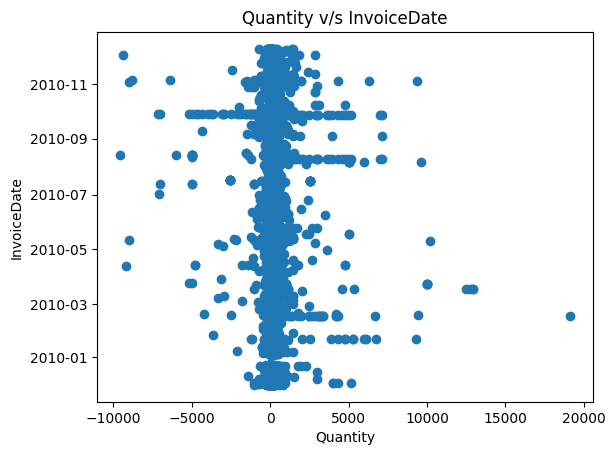

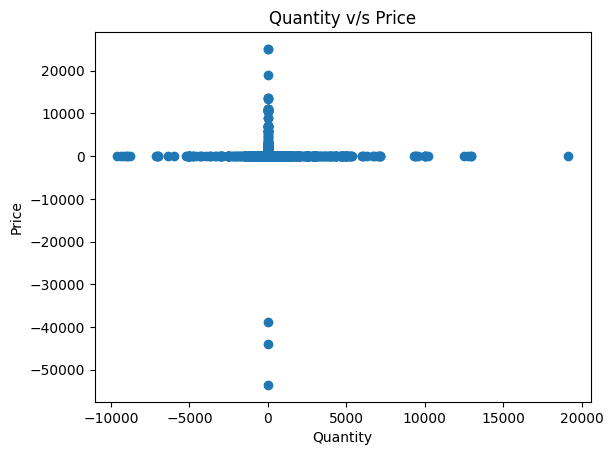

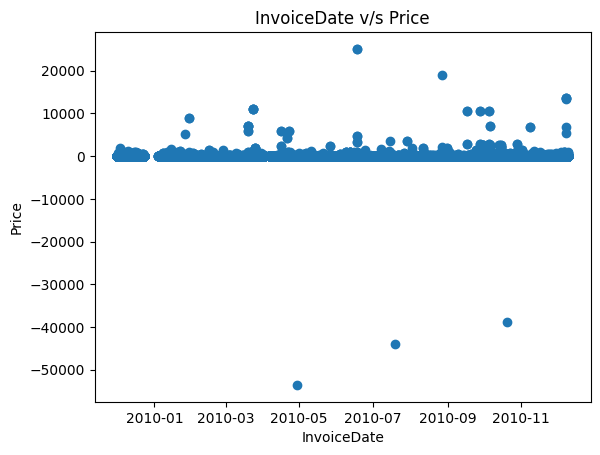

## Correlation:

/var/folders/9z/f3pd2_993pgfk8l_z9thq4yc0000gn/T/ipykernel_6862/2390459975.py:21: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



## Missing Matrix:

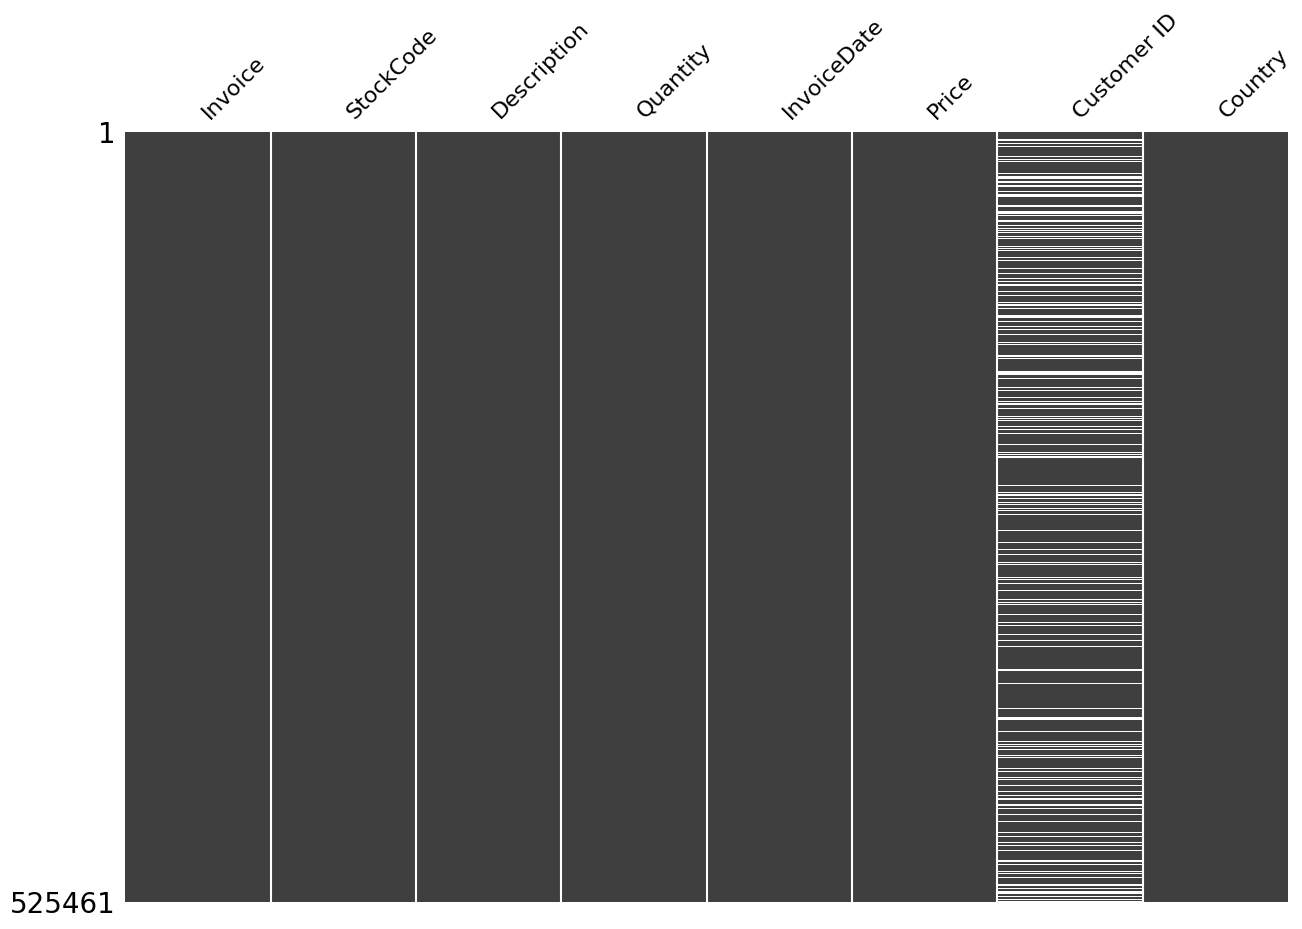

In [51]:
profile_df(df_retail)

    Del análisis multivariado...

Lo que más llama la atención:
- El gráfico de quantity vs price pareciera mostrar casi todos los puntos cercanos a precio 0, lo que indica que este gráfico está distorcionado por los valores atípicos.
- La correlación entre Quantity y Price es de -0.001, lo que indica que hay una correlación muy baja entre estas variables.
- Solo hay nulos en la columna Customer ID



### 1.2.3 Limpieza de Datos [1 pto]

Como pudo ver en las secciones anteriores, los datos presentan valores erroneos, es por esto que se le solicita que realice una función que permita limpiar el dataset. Realice esta función en base observaciones propias y considere como imposible tener cantidades negativas en las ventas.

Una vez realizada la función, realice nuevamente el análisis exploratorio y comente las principales diferencias.

**Respuesta:**

In [62]:
# Se crea funcion que elimina valores nulos, duplicados, outliers, valores negativos y ceros
def clean_df(df_in):
    df = df_in.copy()
    # dependiendo de la situacion se puede eliminar o imputar valores nulos
    df = df.dropna()
    df = df.drop_duplicates()
    # eliminamos valores negativos y ceros
    df = df.loc[(df['Price'] > 0)]
    # No sabemos si es correcto eliminar valores negativos de cantidad, en este análisis se filtran para enfocarse en ventas.
    df = df.loc[(df['Quantity'] > 0)]
    # tratamiento de outliers 3 desviaciones es 99.7% de los datos, podemos probar menores si no se eliminan suficientes
    df = df.loc[(np.abs(stats.zscore(df['Price'])) < 3)] 
    df = df.loc[(np.abs(stats.zscore(df['Quantity'])) < 3)]
    return df

df_retail_clean = clean_df(df_retail)

# 


## Bivariant Analysis:

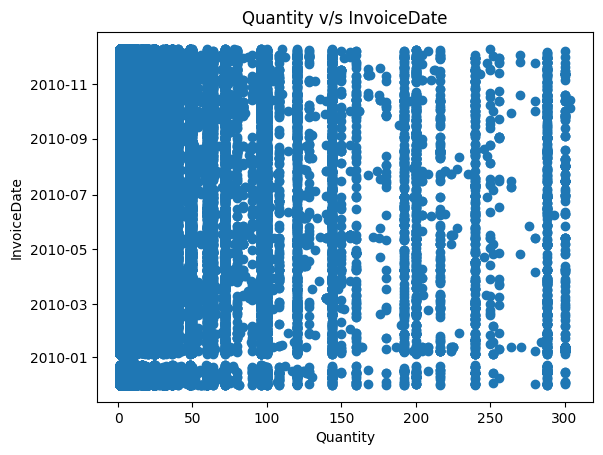

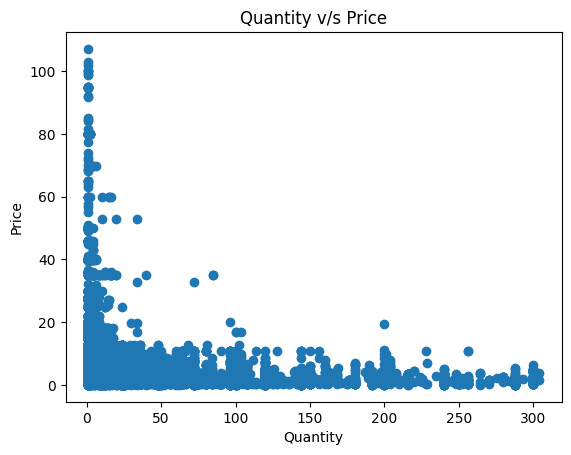

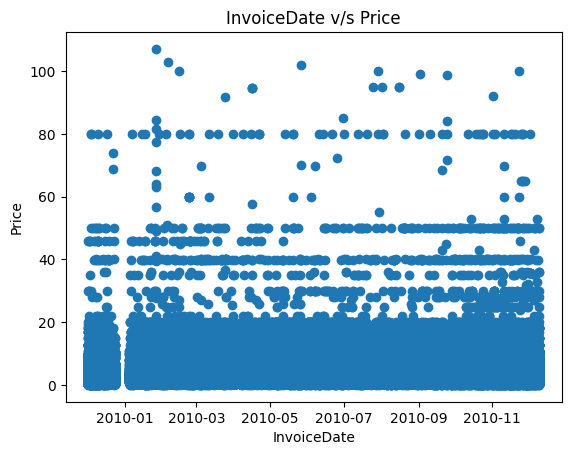

## Correlation:

/var/folders/9z/f3pd2_993pgfk8l_z9thq4yc0000gn/T/ipykernel_6862/2390459975.py:21: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



## Missing Matrix:

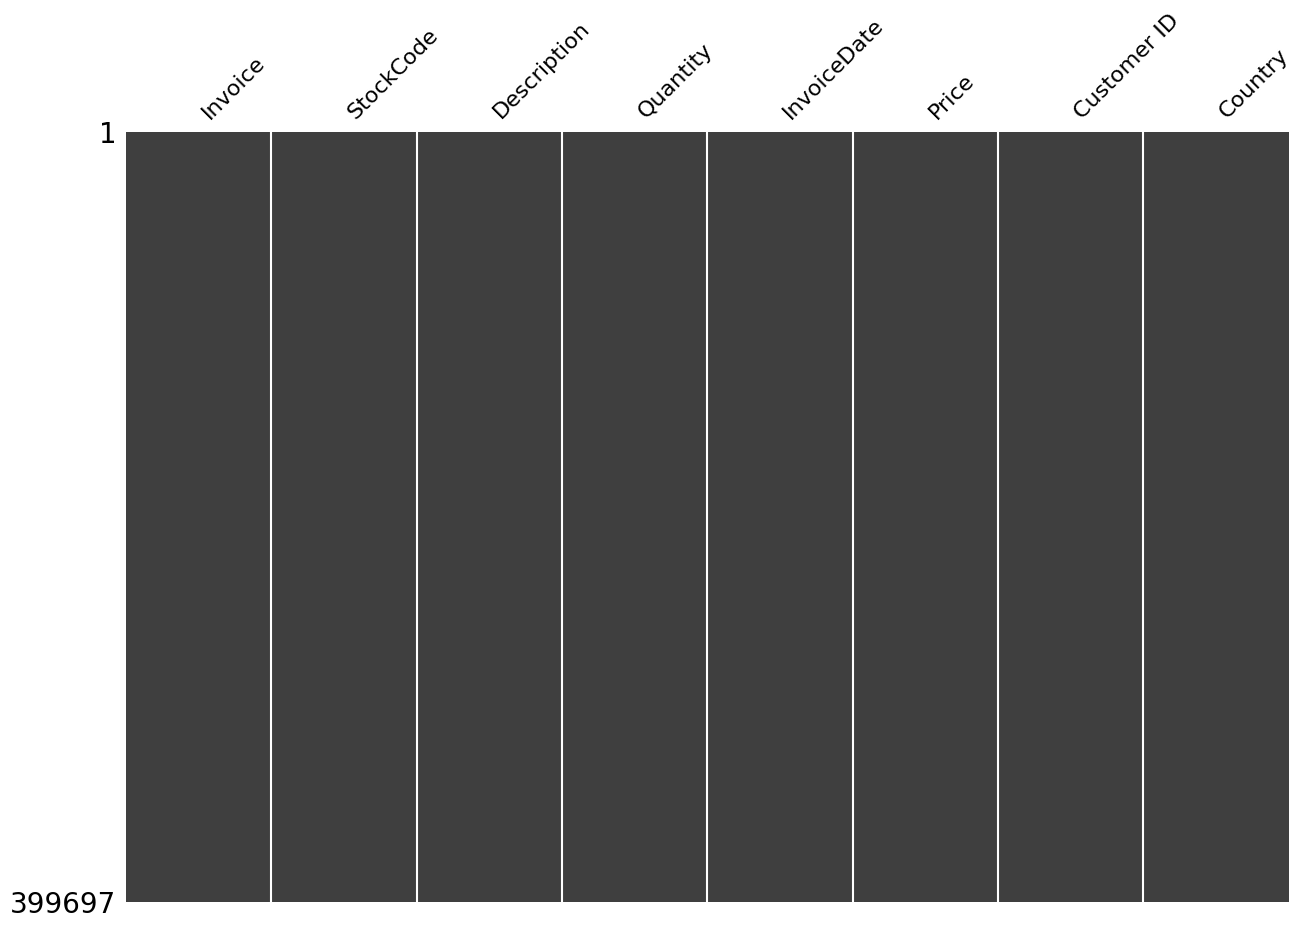

In [63]:
profile_df(df_retail_clean)

    Del análisis multivariado en el df_clean...

Lo que más llama la atención:
- El gráfico de quantity vs price ahora se ve mucho mejor, ya que no hay valores atípicos. Pareciese que hay una correlación negaiva entre estas variables y mientras mayor el precio, menor la cantidad.
- La correlación entre Quantity y Price es de -0.17, lo que indica un gran incremento en la correlación negativa con respecto al dataframe sin limpiar donde casi no se encontraba correlación. Ahora es posible afirmar que a mayor precio, menor la cantidad de unidades vendidas, lo que nos hace sentido. 
- Segun el grafico de InvoiceDate, se puede ver que la mayoria de las compras se realizaron en el 2010, y que en el 2009 solo se realizaron el ultimo mes del año. Además, a finales del 2009 hubieron unas fechas sin ventas, lo que podría ser un error en la data o pudo haber un hecho que obligo a cerrar la tienda.
- Por último, vemos que el dataframe ya no presenta nulos en ninguna columna. Se eliminó aproximadamente el 20% de los registros. Teniendo más información sobre los casos nulos de Customer ID, se podría haber optado por eliminarlos o no. En este caso, se optó por eliminarlos ya que no se tiene más información de por qué ocurrió y podría ser data erronea.


### 1.2.4 Obtención de TOPs [0.75 ptos]

Sin considerar los comentarios realizados en la sección 1.2 , *Don Mora* les pide obtener el **Top de 30 productos que generan más ganancias** para la tienda de retail. Deben considerar todo el registro temporal presente en el dataset y entregar la información en un gráfico de barras de los ingresos/cantidades v/s el nombre de los productos (Utilice `plotly`). ¿Los artículos más vendidos son los mismos que generan más ganancias?, Comente los resultados obtenidos.

**Resultados:**

In [84]:
# Generamos una columna con los ingresos, Quantity * Price
df_retail_clean['Revenue'] = df_retail_clean['Quantity'] * df_retail_clean['Price']

# analizamos los 30 productos con mayor Revenue
top_30_revenue = df_retail_clean.groupby('Description')['Revenue'].sum().sort_values(ascending=False).head(30)
top_30_Quantity = df_retail_clean.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(30)


In [66]:
# generamos un grafico de barras con plotly para visualizar los 30 productos con mayor Revenue, se giran los nombres de los productos para que se vean mejor
fig = px.bar(
    x=top_30_revenue.index,
    y=top_30_revenue.values,
    title=f"30 Products with highest Revenue",
)
fig.update_xaxes(tickangle=30)
fig.show()




In [67]:
# generamos un grafico de barras con plotly para visualizar los 30 productos con mayor Quantity
fig = px.bar(
    x=top_30_Quantity.index,
    y=top_30_Quantity.values,
    title=f"30 Products with highest Quantity",
)
fig.update_xaxes(tickangle=30)
fig.show()

In [81]:
# se agrupa por stockcode y se suman las cantidades y los ingresos
df_retail_clean_top = df_retail_clean.groupby('Description').agg({'Quantity': 'sum', 'Revenue': 'sum'}).reset_index()
df_retail_clean_top

,Description,Quantity,Revenue
0,DOORMAT UNION JACK GUNS AND ROSES,167,1071.25
1,3 STRIPEY MICE FELTCRAFT,662,1241.10
2,4 PURPLE FLOCK DINNER CANDLES,200,265.20
3,ANIMAL STICKERS,385,80.85
4,BLACK PIRATE TREASURE CHEST,45,74.25
...,...,...,...
4428,ZINC HEART LATTICE TRAY OVAL,325,364.15
4429,ZINC METAL HEART DECORATION,12907,15556.91
4430,ZINC POLICE BOX LANTERN,193,783.70
4431,ZINC TOP 2 DOOR WOODEN SHELF,233,1325.35


In [82]:
# agregamos una columna que indica ranking de ingresos y ordenamos de mayor a menor
df_retail_clean_top['Ranking_Revenue'] = df_retail_clean_top['Revenue'].rank(ascending=False)
df_retail_clean_top = df_retail_clean_top.sort_values(by='Ranking_Revenue', ascending=True)

# se repite para cantidad
df_retail_clean_top['Ranking_Quantity'] = df_retail_clean_top['Quantity'].rank(ascending=False)
df_retail_clean_top = df_retail_clean_top.sort_values(by='Ranking_Quantity', ascending=True)
df_retail_clean_top


,Description,Quantity,Revenue,Ranking_Revenue,Ranking_Quantity
4249,WHITE HANGING HEART T-LIGHT HOLDER,46486,125120.44,2.0,1.0
2625,PACK OF 72 RETRO SPOT CAKE CASES,37209,18487.83,48.0,2.0
259,ASSORTED COLOUR BIRD ORNAMENT,35111,56540.23,3.0,3.0
138,60 TEATIME FAIRY CAKE CASES,31096,15569.10,63.0,4.0
4355,WORLD WAR 2 GLIDERS ASSTD DESIGNS,30946,6938.18,269.0,5.0
...,...,...,...,...,...
311,Adjustment by Peter on Jun 25 2010,1,72.45,3566.0,4389.5
2717,PEARL AND CHERRY QUARTZ BRACLET,1,3.50,4358.0,4389.5
340,BAROQUE BUTTERFLY EARRINGS CRYSTAL,1,3.75,4353.5,4389.5
344,BAROQUE BUTTERFLY EARRINGS RED,1,3.75,4353.5,4389.5


In [83]:
# creamos una columna si verifica si el producto esta en el top 30 de ingresos y cantidad al mismo tiempo
df_retail_clean_top['Top_30_Quantity_Revenue'] = df_retail_clean_top.apply(lambda x: 1 if (x['Ranking_Revenue'] <= 30) & (x['Ranking_Quantity'] <= 30) else 0, axis=1)

# se filtra el dataframe para quedarse solo con los productos que estan en el top 30 de ingresos y cantidad al mismo tiempo
df_retail_clean_top = df_retail_clean_top.loc[df_retail_clean_top['Top_30_Quantity_Revenue'] == 1]
df_retail_clean_top

,Description,Quantity,Revenue,Ranking_Revenue,Ranking_Quantity,Top_30_Quantity_Revenue
4249,WHITE HANGING HEART T-LIGHT HOLDER,46486,125120.44,2.0,1.0,1
259,ASSORTED COLOUR BIRD ORNAMENT,35111,56540.23,3.0,3.0,1
2066,JUMBO BAG RED RETROSPOT,27019,47519.25,4.0,6.0,1
3924,STRAWBERRY CERAMIC TRINKET BOX,25330,29694.86,10.0,7.0,1
2070,JUMBO BAG STRAWBERRY,17675,31286.25,8.0,12.0,1
2240,LUNCH BAG RED SPOTTY,17256,26947.60,14.0,13.0,1
2059,JUMBO BAG BAROQUE BLACK WHITE,16580,29349.00,11.0,16.0,1
2075,JUMBO STORAGE BAG SUKI,14712,26443.40,15.0,20.0,1
2064,JUMBO BAG PINK VINTAGE PAISLEY,14126,24762.70,19.0,22.0,1
2068,JUMBO BAG SCANDINAVIAN PAISLEY,13882,24214.90,23.0,24.0,1


## Conclusiones

De los resultados anteriores, podemos ver que solo 12 productos estan presentes en ambos tops, por lo que podemos decir que los productos más vendidos no necesariamente son los que generan más ganancias. Esto se debe a que algunos de los productos más vendidos tienen un precio más bajo, por lo que a pesar que se vendan muchas unidades, no generan tantas ganancias como los productos más caros. 

Por otro lado, los que tienen mayores Revenue, algunos tienen un precio más alto, por lo que no necesariamente se venden tantas unidades para estan dentro del top 30, siendo incluso que el producto de mayor revenue (Regency) no está en el top 30 de mayor quantity.

Finalmente podemos ver que el producto que más vende y al mismo tiempo 2do con mayor revenue es el "WHITE HANGING HEART T-LIGHT HOLDER".


### 1.2.5 Visualización del registro temporal [0,75 ptos]

El dueño del retail en su afán por saber más sobre los datos de su firma les solicita que grafiquen las ventas respecto al tiempo. Con esto les aclara que durante el día tienen muchas variaciones en sus ventas, por lo que les recomienda que consideren el registro temporal como `año-mes-día`. ¿Es posible observar datos extraños?, Comente lo que observa del gráfico.

In [85]:

def plot_ventas(dataframe, _variable = 'Quantity'):
    df = dataframe.copy()
    # Se crea una nueva columna en formato YYYY-MM-DD con la fecha de la compra
    df['Date'] = df['InvoiceDate'].dt.strftime('%Y-%m-%d')

    # Se agrupa por Date y se suma la venta diaria
    df = df.groupby('Date')[_variable].sum()

    # Se crea un grafico de linea con plotly
    fig = px.line(
        x=df.index,
        y=df.values,
        title=f"Daily {_variable} by Date",
    )
    fig.show()


In [86]:
plot_ventas(df_retail_clean)


No es tan claro el análisis de la visualización, se puede ver que a finales de diciembre 2009 parecieran haber datos faltantes, ya que hay una linea recta que indica ausencia de data en esos días. 

También podemos ver que Octubre y Diciembre de 2010 las ventas son mucho mayores, incluso más que el 2009, lo que podría indicar que la empresa creció en ese año o que existió algún evento que trajo más ventas.

No está de más recordar que este dataframe filtró sus outliers, por lo que si hubiera algún peak de ventas por navidad por ejemplo, este quizás no se vea reflejado en el gráfico. Esto debemos tenerlo en cuenta a la hora de decidir con que dataframe, que limpieza y que gráfico haremos para responder nuestras preguntas.

# Conclusión
Eso ha sido todo para el lab de hoy, recuerden que el laboratorio tiene un plazo de entrega de una semana. Cualquier duda del laboratorio, no duden en contactarnos por mail o U-cursos.

![Gracias Totales!](https://i.pinimg.com/originals/65/ae/27/65ae270df87c3c4adcea997e48f60852.gif "bruno")


<br>
<center>
<img src="https://i.kym-cdn.com/photos/images/original/001/194/195/b18.png" width=100 height=50 />
</center>
<br>

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=87110296-876e-426f-b91d-aaf681223468' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>